<a href="https://colab.research.google.com/github/dlhegend/-TS_Academy_Capstone_Project/blob/main/notebooks/AdedoyinCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
NigeriaStock = pd.read_csv("C:\\Users\\Administrator\\Downloads\\NGX_ASI_Index_Price_Data.csv")

In [ ]:
NigeriaStock.head()

,date,avr_monthly_kiloprice
0,2012-Jan,20.80
1,2012-Feb,20.52
2,2012-Mar,20.92
3,2012-Apr,21.27
4,2012-May,22.41


In [ ]:
NigeriaStock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   137 non-null    object 
 1   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
NigeriaStock.isnull().sum()
#to check for missing values

date                     0
avr_monthly_kiloprice    0
dtype: int64

In [ ]:
#to convert the dates to datetime and set it as index
NigeriaStock['date'] = pd.to_datetime(NigeriaStock['date'])
NigeriaStock.set_index('date', inplace = True)

In [ ]:
NigeriaStock.head()

,avr_monthly_kiloprice
date,
2012-01-01,20.80
2012-02-01,20.52
2012-03-01,20.92
2012-04-01,21.27
2012-05-01,22.41


In [ ]:
NigeriaStock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2012-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


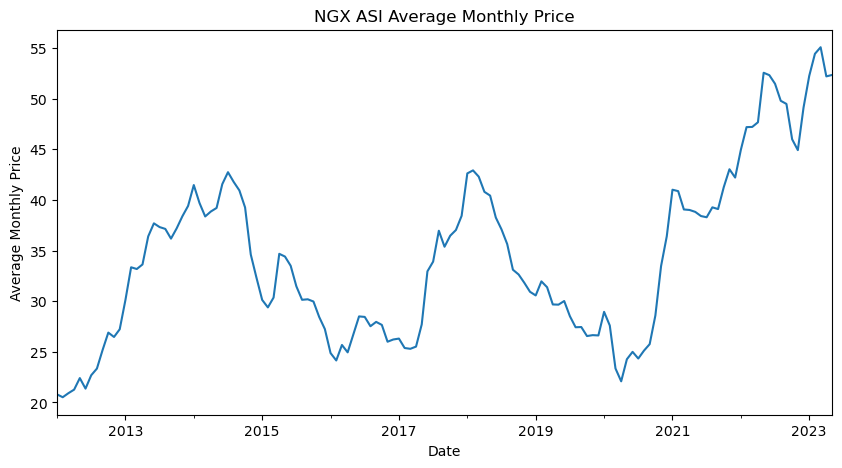

In [ ]:
#plot the series and show trend and seasonality
NigeriaStock['avr_monthly_kiloprice'].plot(title = 'NGX ASI Average Monthly Price', figsize = (10,5))
plt.xlabel('Date')
plt.ylabel('Average Monthly Price')
plt.show()

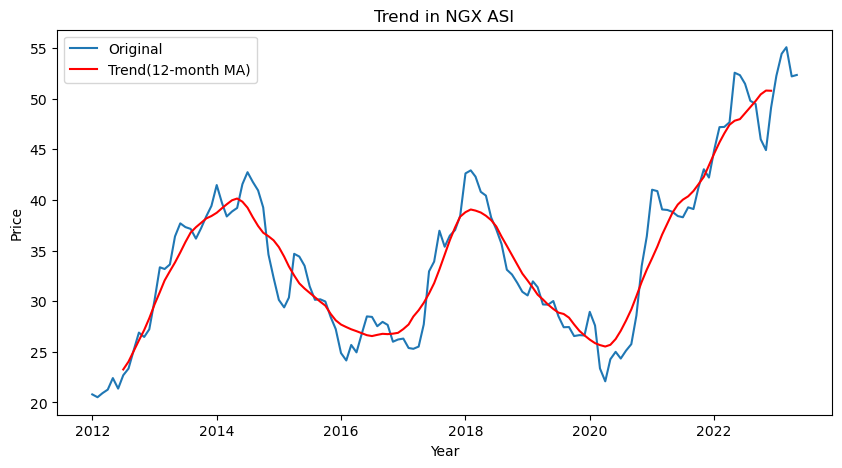

In [ ]:
NigeriaStock['Trend'] = NigeriaStock['avr_monthly_kiloprice'].rolling(window = 12, center = True).mean()
plt.figure(figsize=(10,5))
plt.plot(NigeriaStock['avr_monthly_kiloprice'], label = 'Original')
plt.plot(NigeriaStock['Trend'], label = 'Trend(12-month MA)', color = 'red')
plt.title('Trend in NGX ASI')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

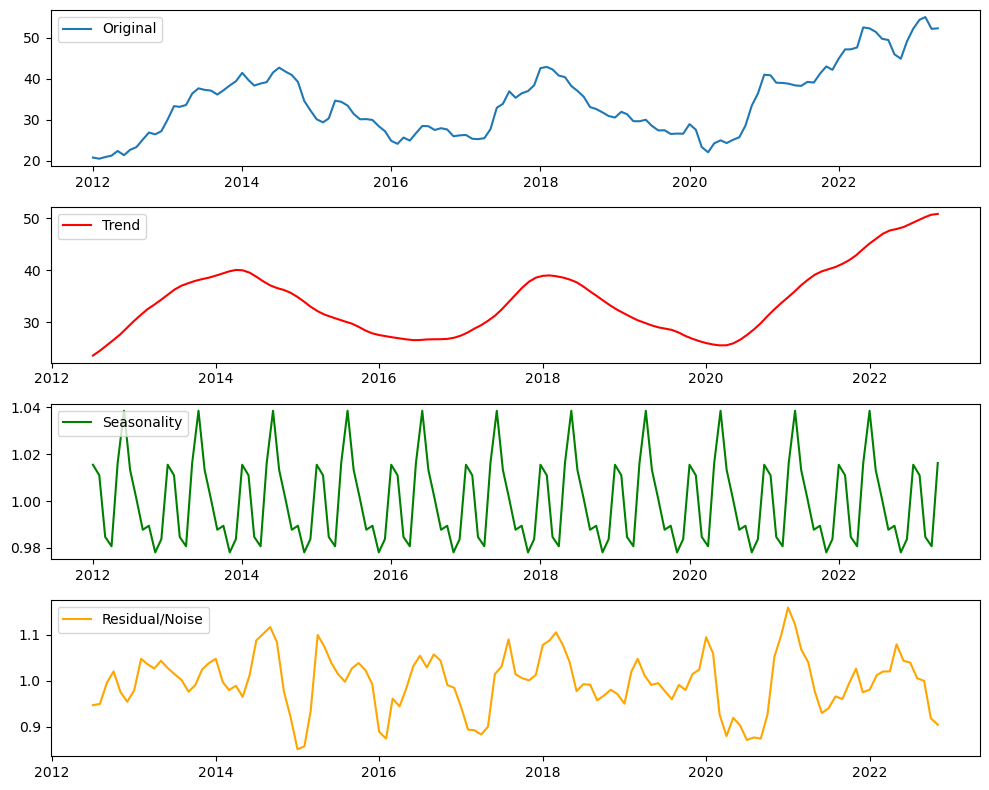

In [ ]:
#to see the different components of the dataset and decide which model to use
decomposition = seasonal_decompose(NigeriaStock['avr_monthly_kiloprice'], model = 'multiplicative', period = 12
                                  )
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(NigeriaStock['avr_monthly_kiloprice'], label = 'Original')
plt.legend(loc = 'upper left')

plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend', color = 'red')
plt.legend(loc = 'upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonality', color = 'green')
plt.legend(loc = 'upper left')

plt.subplot(4,1,4)
plt.plot(residual, label = 'Residual/Noise', color = 'orange')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [ ]:
#to test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(NigeriaStock['avr_monthly_kiloprice'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print('The series is likely stationary')
else:
    print('The series is likely non-stationary')

ADF Statistic: -1.6879689803233122
p-value: 0.43732163713514105
The series is likely non-stationary


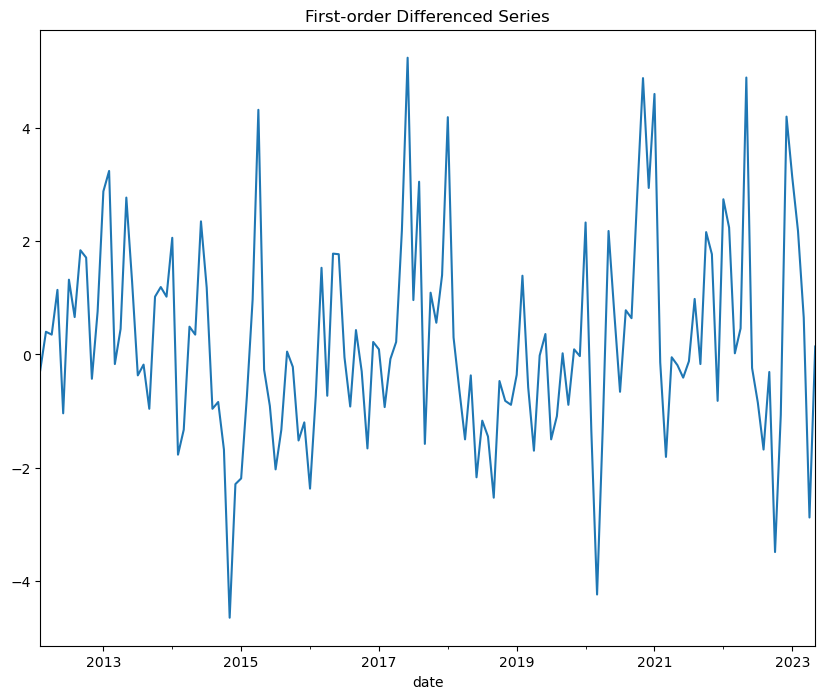

In [ ]:
#since the series is non-stationary, differencing is done to make it stationary
NigeriaStock['Diff_1'] = NigeriaStock['avr_monthly_kiloprice'] - NigeriaStock['avr_monthly_kiloprice'].shift(1)
NigeriaStock_diff = NigeriaStock['Diff_1'].dropna()
NigeriaStock_diff.plot(title = 'First-order Differenced Series', figsize=(10,8))
plt.show()

In [ ]:
#to check if data is now stationary
result_diff = adfuller(NigeriaStock_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
if result_diff[1] < 0.05:
    print('The series is likely stationary')
else:
    print('The series is likely non-stationary')

ADF Statistic: -7.712285260348138
p-value: 1.2545806686242544e-11
The series is likely stationary


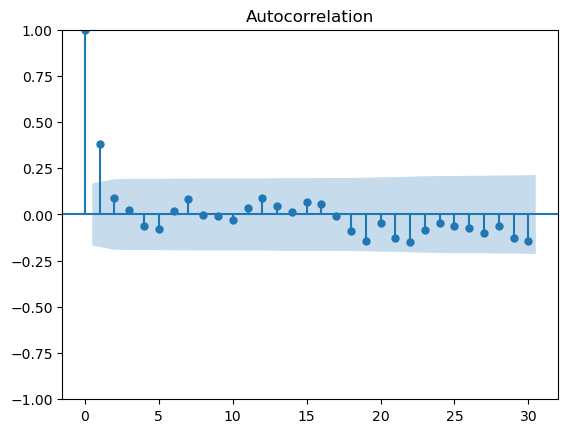

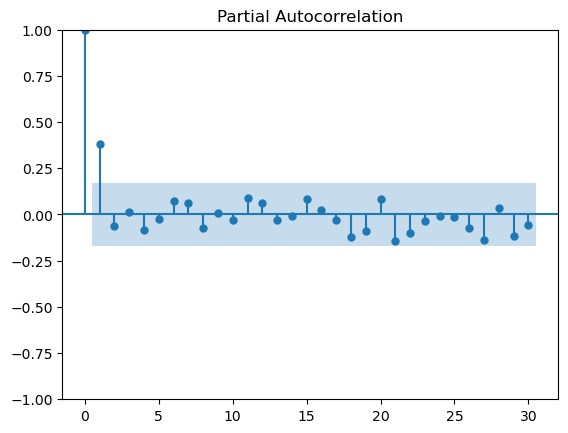

In [ ]:
#check for autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(NigeriaStock_diff, lags=30)
plt.show()

plot_pacf(NigeriaStock_diff, lags=30)
plt.show()

In [ ]:
#the data is splitted into train and test set, 0.8 means 80% of data
train_size = int(len(NigeriaStock) * 0.8)
train = NigeriaStock['avr_monthly_kiloprice'][:train_size]
test = NigeriaStock['avr_monthly_kiloprice'][train_size:]

In [ ]:
train.tail()

date
2020-09-01    25.76
2020-10-01    28.59
2020-11-01    33.47
2020-12-01    36.41
2021-01-01    41.01
Name: avr_monthly_kiloprice, dtype: float64

In [ ]:
train.head()

date
2012-01-01    20.80
2012-02-01    20.52
2012-03-01    20.92
2012-04-01    21.27
2012-05-01    22.41
Name: avr_monthly_kiloprice, dtype: float64

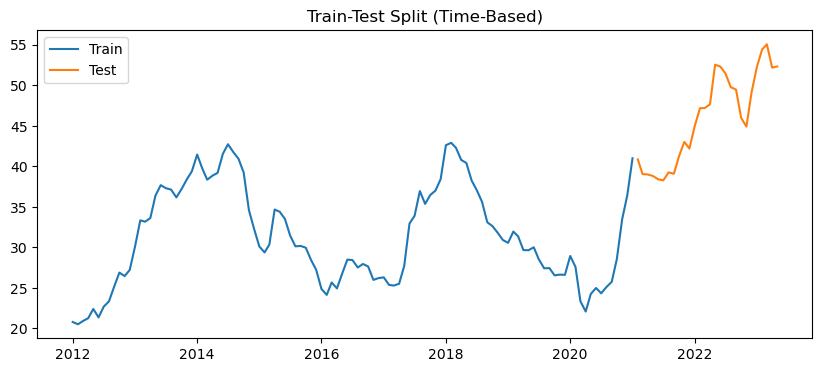

In [ ]:
#this shows the train and test set
plt.figure(figsize=(10,4))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend()
plt.title('Train-Test Split (Time-Based)')
plt.show()

In [ ]:
#import ARIMA model and fit
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1))
fitted_model = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


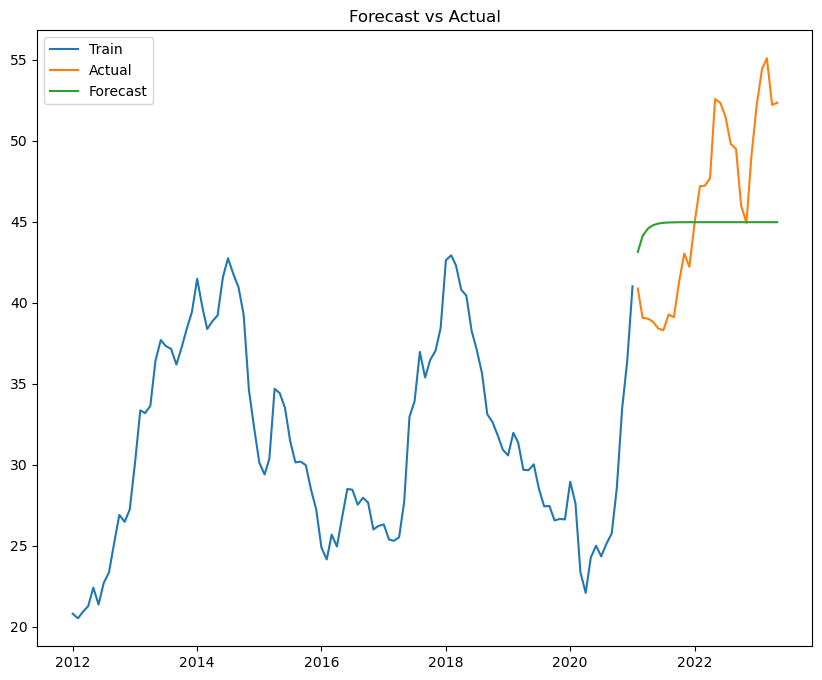

In [ ]:
forecast_1 = fitted_model.forecast(steps = len(test))
plt.figure(figsize=(10,8))
plt.plot(train, label ='Train')
plt.plot(test, label = 'Actual')
plt.plot(forecast_1, label = 'Forecast')
plt.legend()
plt.title('Forecast vs Actual')
plt.show()